In [1]:
import numpy as np
import sys
sys.path.append('/Users/apple/Documents/ML_Project/ML - 2.1/module')
from utils import get_data, get_data2, XGBoost_test
%config InlineBackend.figure_format='retina'

/Users/apple/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Spain

## max_depth

---- Spain dataset ----
get_data(hour_num=1, transform='sin+cos', drop_time=True, scale=True)

Input space: Index(['wind_speed', 'sin(wd)', 'cos(wd)', 'wind_speed-1', 'sin(wd)-1',
       'cos(wd)-1', 'wind_power-1'],
      dtype='object')
train index: [6426, 10427] train_len: 4000
test index: [14389, 15390] test_len: 1000


[22:33:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:33:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:33:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:33:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:33:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:33:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:33:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:33:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:33:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

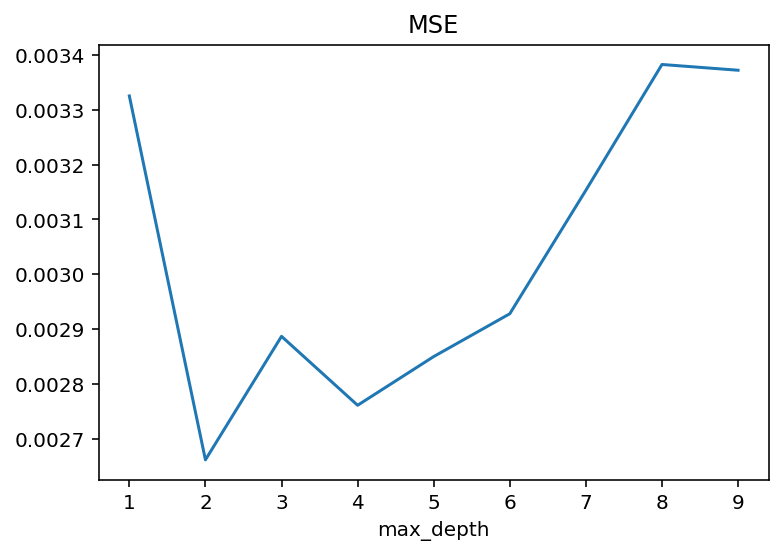

In [5]:
X_train, X_test, Y_train, Y_test ,Y_scaler= get_data(
    hour_num=1, transform='sin+cos',
    train_index=[6426,10427],
    test_index=[14389,15390],
    return_y_scaler=True)

from tqdm.notebook import tqdm as tqdm
mse_list = []
for max_depth in tqdm(range(1,10)):
    mse = XGBoost_test(X_train, X_test, Y_train, Y_test, 
                 max_depth=max_depth, n_estimators=100, learning_rate=0.1, 
                 min_child_weight=1, n_jobs=4, verbose_eval=False,
                 verbose=False, plot_predict=False, 
                 return_y_pred=False, return_mse=True, 
                 Y_scaler=None)
    mse_list.append(mse)
    
import pandas as pd
mse_list = pd.Series(mse_list)
mse_list.index = range(1,10)
mse_list.index.name = 'max_depth'
mse_list.plot(title='MSE')

## n_estimators

---- Spain dataset ----
get_data(hour_num=1, transform='sin+cos', drop_time=True, scale=True)

Input space: Index(['wind_speed', 'sin(wd)', 'cos(wd)', 'wind_speed-1', 'sin(wd)-1',
       'cos(wd)-1', 'wind_power-1'],
      dtype='object')
train index: [6426, 10427] train_len: 4000
test index: [14389, 15390] test_len: 1000
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1) 

[22:33:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Test MSE 0.0026614413208772537


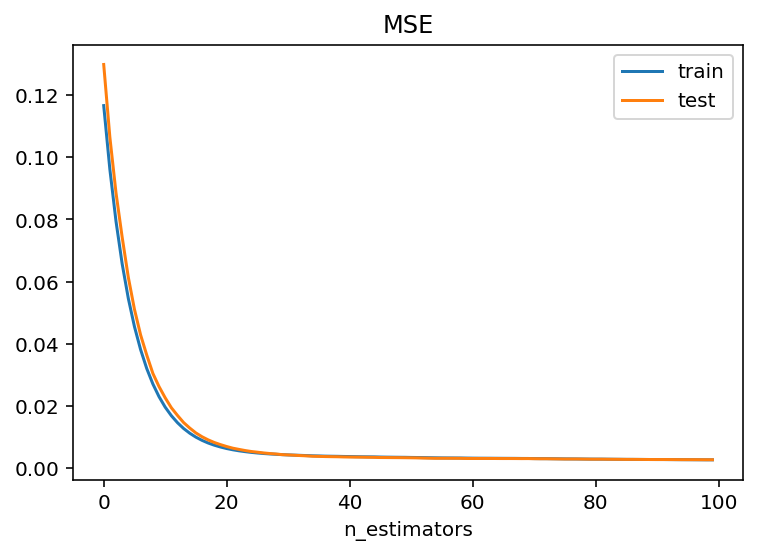

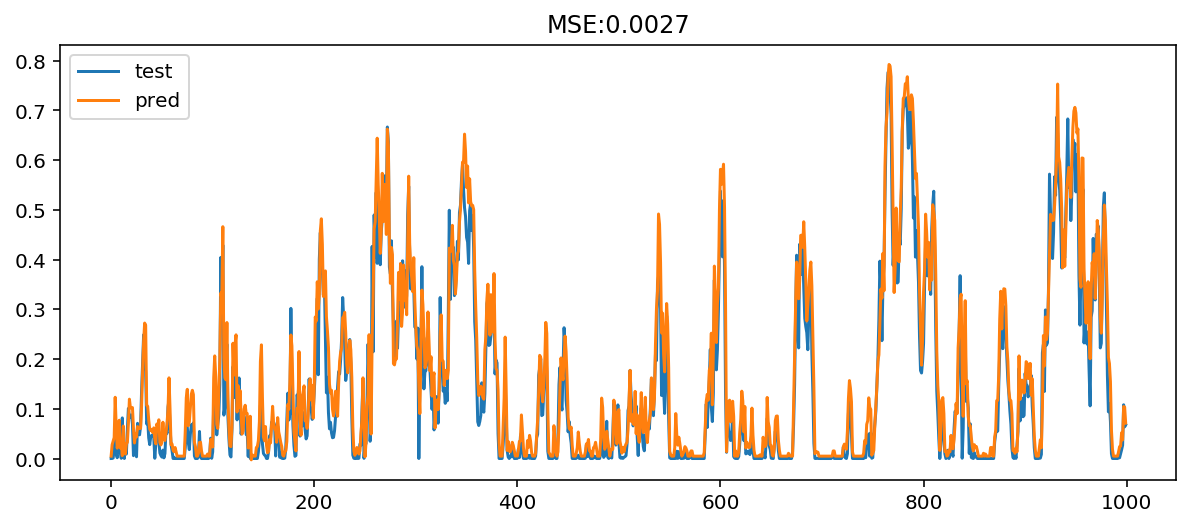

In [6]:
X_train, X_test, Y_train, Y_test ,Y_scaler= get_data(
    hour_num=1, transform='sin+cos',
    train_index=[6426,10427],
    test_index=[14389,15390],
    return_y_scaler=True)

Y_pred = XGBoost_test(X_train, X_test, Y_train, Y_test, 
                 max_depth=2, n_estimators=100, learning_rate=0.1, 
                 min_child_weight=1, n_jobs=4, verbose_eval=False,
                 verbose=True, plot_predict=True, 
                 return_y_pred=True, return_mse=False, 
                 Y_scaler=None)

# US

## max_depth

---- US dataset ----
get_data2(hour_num=1, transform='sin+cos', drop_time=True, drop_esle=True, scale=True)

Data: ['相近8个地点2012年数据', '20738-2012.csv'] 

Input space: Index(['wind_speed', 'sin(wd)', 'cos(wd)', 'wind_speed-1', 'sin(wd)-1',
       'cos(wd)-1', 'wind_power-1'],
      dtype='object')
train index: [3001, 7002] train_len: 4000
test index: [2000, 3001] test_len: 1000


[22:36:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

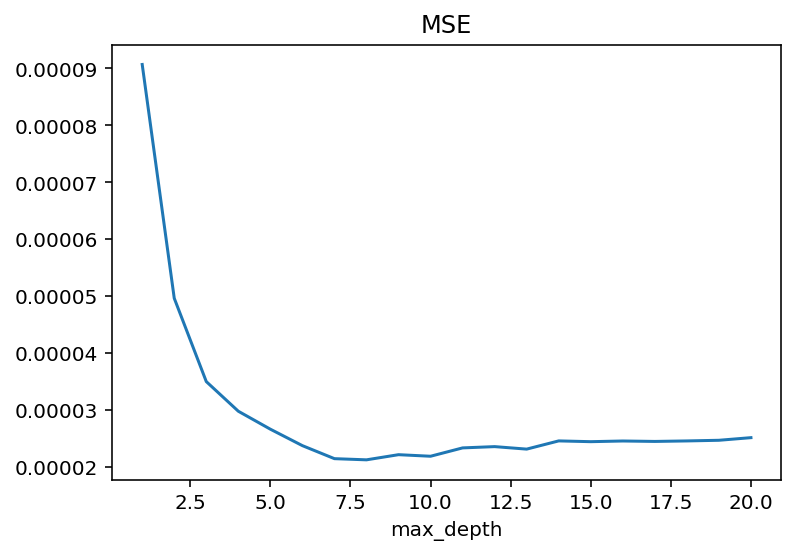

In [10]:
X_train, X_test, Y_train, Y_test ,Y_scaler= get_data2(
    hour_num=1, transform='sin+cos',
    train_index=[3001,7002],
    test_index=[2000,3001],
    return_y_scaler=True,
    drop_else=True)

from tqdm.notebook import tqdm as tqdm
mse_list = []
for max_depth in tqdm(range(1,21)):
    mse = XGBoost_test(X_train, X_test, Y_train, Y_test, 
                 max_depth=max_depth, n_estimators=100, learning_rate=0.1, 
                 min_child_weight=1, n_jobs=4, verbose_eval=False,
                 verbose=False, plot_predict=False, 
                 return_y_pred=False, return_mse=True, 
                 Y_scaler=None)
    mse_list.append(mse)
    
import pandas as pd
mse_list = pd.Series(mse_list)
mse_list.index = range(1,21)
mse_list.index.name = 'max_depth'
mse_list.plot(title='MSE')

## n_estimators

---- US dataset ----
get_data2(hour_num=1, transform='sin+cos', drop_time=True, drop_esle=True, scale=True)

Data: ['相近8个地点2012年数据', '20738-2012.csv'] 

Input space: Index(['wind_speed', 'sin(wd)', 'cos(wd)', 'wind_speed-1', 'sin(wd)-1',
       'cos(wd)-1', 'wind_power-1'],
      dtype='object')
train index: [3001, 7002] train_len: 4000
test index: [2000, 3001] test_len: 1000
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1) 

[22:37:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Test MSE 2.147590443

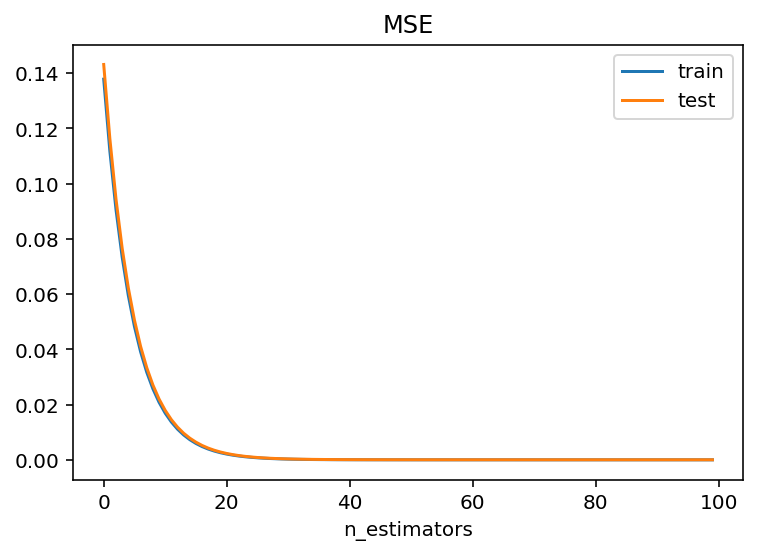

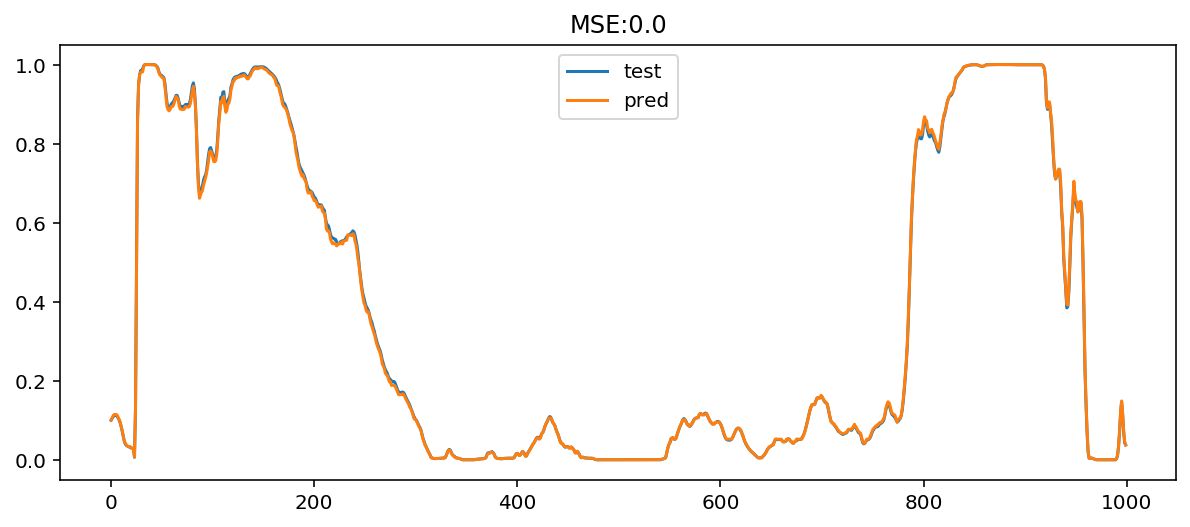

In [11]:
X_train, X_test, Y_train, Y_test ,Y_scaler= get_data2(
    hour_num=1, transform='sin+cos',
    train_index=[3001,7002],
    test_index=[2000,3001],
    return_y_scaler=True,
    drop_else=True)

Y_pred = XGBoost_test(X_train, X_test, Y_train, Y_test, 
                 max_depth=7, n_estimators=100, learning_rate=0.1, 
                 min_child_weight=1, n_jobs=4, verbose_eval=False,
                 verbose=True, plot_predict=True, 
                 return_y_pred=True, return_mse=False, 
                 Y_scaler=None)